## 회귀 소개
```
regression toward the mean
```

회귀란, 여러 개의 독립 변수와 한 개의 종속 변수 간의 상관관계를 모델링하는 기법

머신러닝 관점에서 보면, 독립변수는 피처, 종속변수는 결정 값.

  * 피처와 결정 데이터에 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것이 핵심

```
회귀 계수가 선형 / 비선형 -> 선형 회귀 / 비선형 회귀

독립변수의 개수가 한 개 / 여러 개 ->  단일 회귀, 다중 회귀
```
지도학습 : 분류(예측값이 카테고리와 같은 이산형) / 회귀(예측값이 연속형)

회귀 종류 :
* 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares) 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

* 릿지(Ridge)： 릿지 회귀는 선형 회귀에 **L2 규제를 추가**한 회귀 모델. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델

* 라쏘(Lasso)： 라쏘 회귀는 선형 회귀에 **L1 규제를 적용한 방식**. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. 이러
한 특성 때문에 L1 규제는 피처 선택 기능으로도 불림

* 엘라스틱넷(티asticNet)： **L2, L1 규제를 함께 결합한 모델**. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함.

* 로지스틱 회귀(Logistic Regression)： 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 **분류에 사용되는 선형 모델**. 로지스틱 회귀는 매우 강력한 분류 알고리즘. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들
어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.


## 단순 선형 회귀를 통한 회귀 이해

- 독립변수, 종속변수 한 개

- 직선 형태로 표현

- 잔차 : 실제 값과 회귀 모델 값의 차

- 전체 데이터의 잔차 합(Mean Absolute Error / RSS Residual Sum of Squrare)이 최소가 되도록 최적의 회귀 모델을 생성

- 이때 parameter이 회귀계수임을 유의. 학습 데이터로 입력 받은 독립 변수 및 종속 변수는 상수

- RSS는 비용이며 회귀 계수로 표현되는 RSS를 비용 함수( or 손실 함수 loss function)라고 함.

- 머신러닝 회귀 알고리즘은 데이터를 계속 학습시키면서 이 비용함수가 반환하는 오류를 지속적으로 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

## 비용 최소화하기 - 경사 하강법 (Gradient Descent) 소개

- 경사 하강법은 고차원 방정식에 대한 문제를 해결해주면서 비용 함수를 최소화하는 방법을 직관적으로 제공

- "데이터를 기반으로 알고리즘이 스스로 학습한다"

- "점진적으로" 반복적인 계산을 통해 회귀계수 파라미터 값을 업데이트하면서 오류 값이 최소가 되는(오류 값이 더 이상 작아지지 않는) 회귀계수 파라미터를 구하는 방식

  - Step 1： W1,W0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산.
  - Step 2： W1 = W1 + (편미분한 결과값에 보정계수를 곱한 값)으로 업데이트한 후 다시 비용 함수의 값을 계산.
  - Step 3： 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 Step 2를 반복하면서 W1,W0을 계속 업데이트.




In [13]:
# 임의로 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.randn(100,1)
y = 6 + 4 * X+np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)
plt.show()

In [14]:
# 비용함수 정의
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y,y_pred))/N
  return cost

In [15]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y,learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) 
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [16]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01) 
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [19]:
def get_cost(y, y_pred): 
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N 
    return cost

w1 , w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1 [0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.057 w0: 6.075
Gradient Descent Total Cost:1.0572


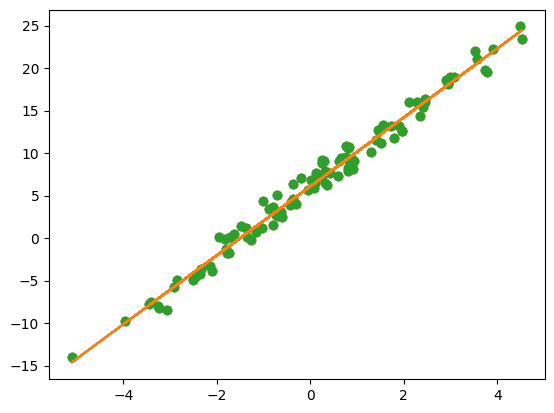

In [21]:
plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()

* 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림 -> 확률적 경사 하강법(Stochastic Gradient Descent)
* 확률적 경사 하강법: 일부 데이터만 이용해 w가 업데이트되는 값을 계산하여 경사 하강법에 비해 빠른 속도 보장

In [22]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0    

In [23]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.072 w0: 6.064
Stochastic Gradient Descent Total Cost: 1.0582


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1,w0와 큰 차이가 없으며, 예측 오류 비용또한 아주 높을 뿐으로 큰 예측 성능상 차이가 없음. -> 큰 데이터를 처리할 경우에는 경사하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares
LinearRegression 클래스: 예측값과 실제 값의 RSS(Residual Sum of Squares) 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스

LinearRegression 클래스는 fit() 메서드로 X,y 배열을 입력받으면 회귀 계수(coefficient)인 w를 coef_ 속성에 저장

[입력 파라미터]
* fit_intercept : 불린값으로, True default.
* normalize : 불린값으로, False default. fit_intercept가 True이면 회귀 수행하기 전 입력 데이터 세트 정규화

[속성]
* coef_ : fit() 메서드 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성
* intercept_ : intercept 값.

피처간의 상관관계가 매우 높은 경우, 분산이 매우 커지는 다중공산성(multi-collinearity) 문제 발생

-> 독립적인 중요한 피처만 남기고 제거하거나 규제 적용, PCA를 통한 차원 축소 수행

### 회귀 평가 지표

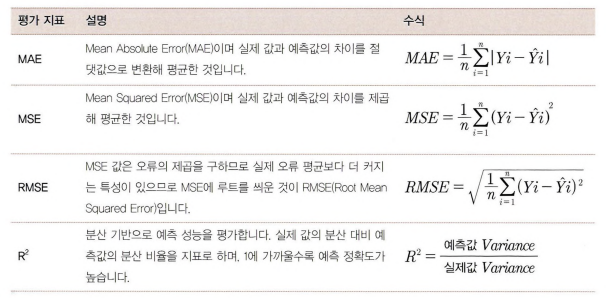

이외에도 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error) 사용

MAE : metrics.mean_absolute_error / 'neg_mean_absolute_error'

MSE : metrics.mean_squared_error / 'neg_mean_squared_error'

RMSE : metrics.mean_squared_error (squared = False) / 'neg_root_mean_squared_error'

MSLE : metrics.mean_squared_log_error / 'neg_mean_squared_log_error'

R^2: metrics.r2_score / 'r2'

‘**neg**_mean_absolute_error’ : -1 * metrics. mean_absolute_error()

-> Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문

## Linear Regression을 이용해 보스턴 주택 가격 회귀 구현

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# boston 데이터 세트 로드
boston = fetch_openml(name='boston')

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# CHAS와 RAD를 float 형으로 변환
bostonDF['CHAS']=bostonDF['CHAS'].astype(np.float64)
bostonDF['RAD']=bostonDF['RAD'].astype(np.float64)

# boston 데이터 세트 Target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


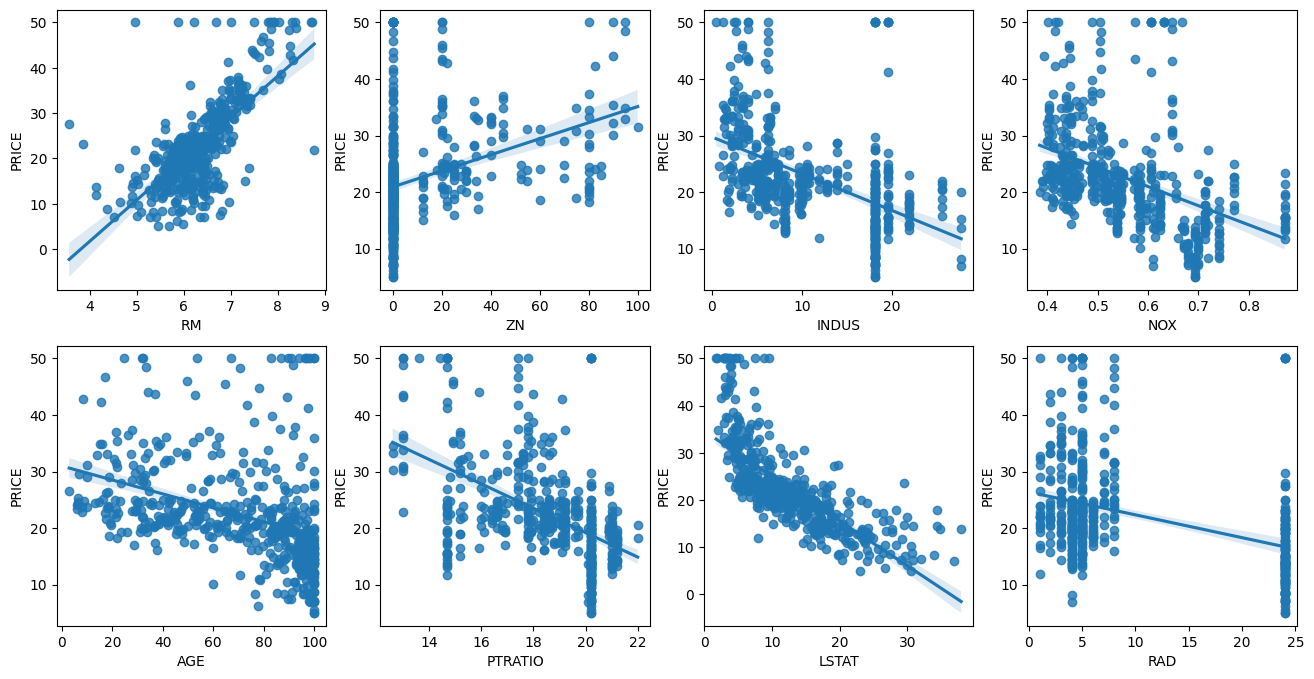

In [68]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 파악 -> regplot( )
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
bostonDF['RAD'] = bostonDF['RAD'].astype(int)
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y = 'PRICE', data=bostonDF, ax = axs[row][col])
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3,random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()

lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [70]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216415
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [72]:
coeff = pd.Series(data = np.round(lr.coef_,1),index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [73]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error)로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


## 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해
회귀가 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 함.

다항 회귀는 **선형**회귀. (구분 기준 : 회귀 계수가 선형/비선형)

PolynomialFeatures -> 클래스 피처를 다항식 피처로 변환

In [75]:
# 단항 계수 피처를 2차 다항 계수로 변환
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [77]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [79]:
# 일차 단항식 계수를 삼차 다항식 계수로 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에서 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def  polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline객체로 Streamline하게 Polynomial Feature 반환과 Linear Regression 연결
model = Pipeline([('poly',PolynomialFeatures(degree = 3)),
                 ('linear',LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링을 할 수 있음. 하지만 과적합 우려. 

In [85]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.


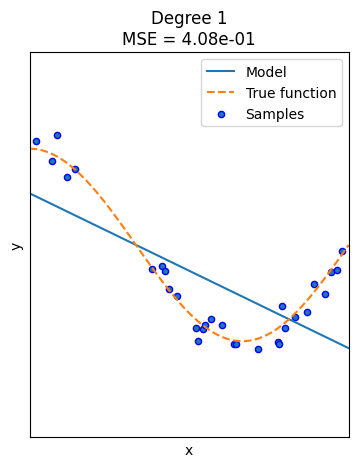


Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.043208749872318084 입니다.


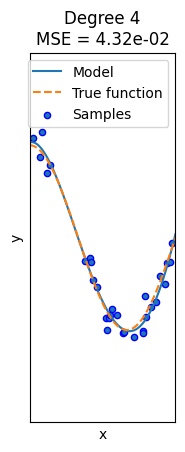


Degree 15 회귀 계수는 [-2.98296000e+03  1.03900220e+05 -1.87417578e+06  2.03717768e+07
 -1.44874367e+08  7.09320603e+08 -2.47067602e+09  6.24565606e+09
 -1.15677353e+10  1.56896082e+10 -1.54007153e+10  1.06458050e+10
 -4.91381191e+09  1.35920668e+09 -1.70382083e+08] 입니다.
Degree 15 MSE 는 182663484.61576504 입니다.


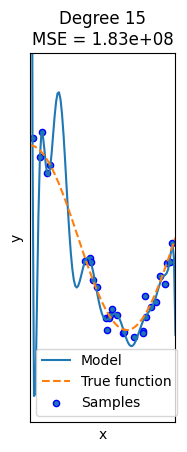

In [87]:
# 다항식 차수를 1,4,15로 변경하면서 예측 결과 비교

plt.figure(figsize = (14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())

    # 개별 degree 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc = 'best')
    plt.title('Degree {}\nMSE = {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

    plt.show()

실선은 다항 회귀 예측 곡선, 점선은 실제 데이터 세트 X,Y의 코사인 곡선

Degree 1 예측 곡선 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해보임 예측 곡선이 학습 데이터의 패턴을 제대로 반영하기 못하는 과적합 모델임 MSE는 약 0.407

Degree 4 예측 곡선 실제 데이터 세트와 유사한 모습, MSE가 약 0.043으로 가장 뛰어난 모델

Degree 15 예측 곡선 MSE 값이 엄청 큰 과적합이 심한 모델 변동 잡음 값까지 너무 지나치게 반영한 결과 예측 곡선이 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선 만들어짐

### 편향 분산 트레이드 오프

매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있는 모델을 고편향(High Bias)성을 가짐

매우 복잡한 모델로서 지나치게 높은 변동성을 가지는 모델은 고분산(High Variance)성을 가짐

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음

높은 편향 & 낮은 분산 : 과소적합되기 쉬움
낮은 편향 & 높은 분산 : 과적합되기 쉬움

두가지가 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적